<a href="https://colab.research.google.com/github/Nikita-Roy/Rainfall-Prediction/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

data = pd.read_csv('austin_weather.csv')

#data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis = 1)

data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

data.to_csv('austin_weather.csv')


The precipitation trend graph : 


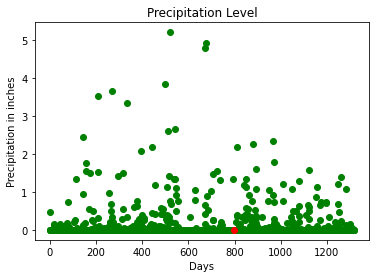

Precipitation vs selected attributes graph : 


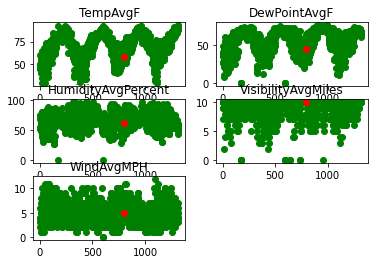

In [35]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('austin_weather.csv')

X = data.drop(['PrecipitationSumInches'], axis = 1)
Y = data['PrecipitationSumInches']

Y = Y.values.reshape(-1, 1)

DayIndex = 798
Days = [i for i in range(Y.size)]

clsfr = LinearRegression()
clsfr.fit(X,Y)

ip = np.array([[74], [60], [45], [67], [49], [43], [33], [45], [57], [29.28], [10], [7], [2], [0], [20], [4], [31]])
ip = ip.reshape(1, -1)

#print('The precipitation in inches for the input is : ', clsfr.predict(ip))
print('The precipitation trend graph : ')

plt.scatter(Days, Y, color = 'g')
plt.scatter(Days[DayIndex], Y[DayIndex], color = 'r')
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")

plt.show()

x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelpressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH'], axis = 1)

print("Precipitation vs selected attributes graph : ")

for i in range (x_vis.columns.size):
  plt.subplot(3, 2, i+1)
  plt.scatter(Days, x_vis[x_vis.columns.values[i][:100]], color = 'g')
  plt.scatter(Days[DayIndex], x_vis[x_vis.columns.values[i]][DayIndex], color = 'r')
  plt.title(x_vis.columns.values[i])

plt.show()
